STARTING WITH ANALYTICS

In [1]:
import pandas as pd
eixample_2023= pd.read_csv("./data/station_Barcelona_Eixample_1_years.csv", low_memory=False)

c:\Users\ninab\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
eixample_2023.head()

,CODI EOI,NOM ESTACIO,CO,H2S,HCNM,HCT,NO,NO2,NOX,O3,PM10,PM2.5,PS,SO2,Date_time
0,8019043,Barcelona (Eixample),0.6,NaN,NaN,NaN,39.0,65.0,NaN,5.0,43.0,34.0,NaN,1.0,2024-01-01 01:00:00
1,8019043,Barcelona (Eixample),0.4,NaN,NaN,NaN,31.0,61.0,NaN,10.0,36.0,24.0,NaN,2.0,2024-01-01 02:00:00
2,8019043,Barcelona (Eixample),0.4,NaN,NaN,NaN,16.0,61.0,NaN,6.0,30.0,21.0,NaN,1.0,2024-01-01 03:00:00
3,8019043,Barcelona (Eixample),0.5,NaN,NaN,NaN,31.0,67.0,NaN,2.0,34.0,25.0,NaN,1.0,2024-01-01 04:00:00
4,8019043,Barcelona (Eixample),0.5,NaN,NaN,NaN,25.0,61.0,NaN,2.0,35.0,27.0,NaN,1.0,2024-01-01 05:00:00


In [3]:
def na_values_per_column(eixample_2023): # Conteo de valores NA por columna
    na_values = eixample_2023.isna().sum()

    #print("Conteo de valores NA por columna:")
    return na_values

In [4]:
print(na_values_per_column(eixample_2023))
print('eixample_2023.shape = ',eixample_2023.shape)

CODI EOI          0
NOM ESTACIO       0
CO              166
H2S            8753
HCNM           8753
HCT            8753
NO              341
NO2             341
NOX            5708
O3              244
PM10           1047
PM2.5          1047
PS             8753
SO2             550
Date_time         0
dtype: int64
eixample_2023.shape =  (8753, 15)


In [7]:
!pip install --upgrade seaborn

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 4.1.4 requires pyqt5<5.13; python_version >= "3", which is not installed.
spyder 4.1.4 requires pyqtwebengine<5.13; python_version >= "3", which is not installed.
lenskit 0.14.2 requires pandas==1.*,>=1.0, but you have pandas 2.0.3 which is incompatible.

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



   --------------------------------------- 294.9/294.9 kB 74.4 kB/s eta 0:00:00
   ---------------------------------------- 10.8/10.8 MB 198.5 kB/s eta 0:00:00
   -------------------------------------- 229.9/229.9 kB 163.4 kB/s eta 0:00:00
   -------------------------------------- 345.4/345.4 kB 446.8 kB/s eta 0:00:00
  Attempting uninstall: python-dateutil
    Found existing installation: python-dateutil 2.8.1
    Uninstalling python-dateutil-2.8.1:
      Successfully uninstalled python-dateutil-2.8.1
  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.5
    Uninstalling pandas-1.0.5:
      Successfully uninstalled pandas-1.0.5
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.1
    Uninstalling seaborn-0.10.1:
      Successfully uninstalled seaborn-0.10.1


<ipython-input-8-f4db1199bbfc>:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(eixample_2023['CO'], bins=30, kde=True)


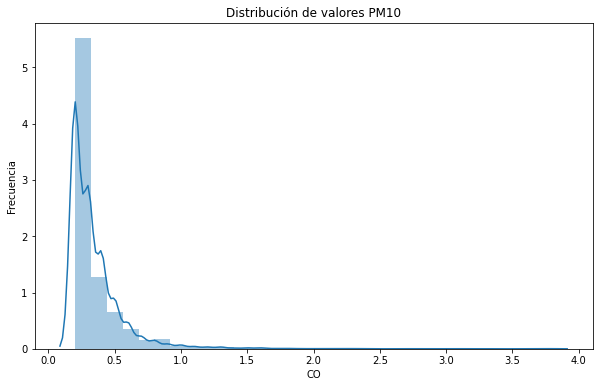

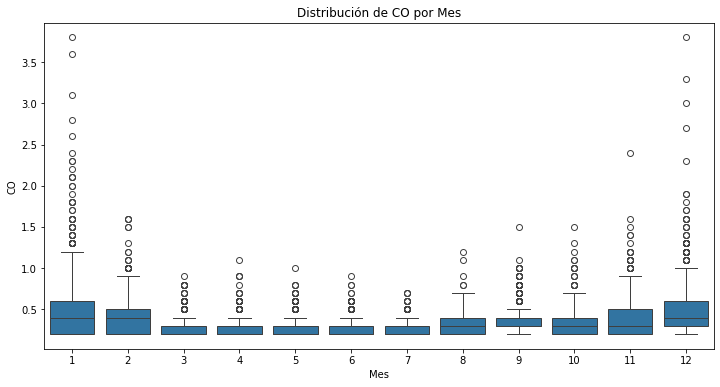

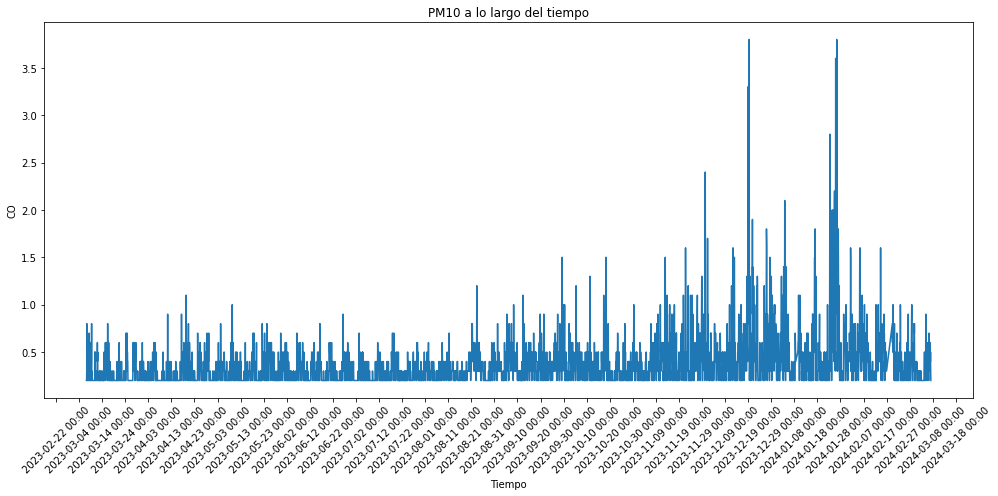

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Supongamos que 'eixample_2023' es tu DataFrame y que tiene las columnas 'DATA', 'Hora' y 'PM10'
# Asegúrate de que la columna 'DATA' y 'Hora' están en el formato correcto

eixample_2023['Date_time'] = pd.to_datetime(eixample_2023['Date_time'])

# Si tu columna 'Hora' ya contiene información de tiempo en formato reconocible,
# no necesitas añadir ":00:00" al final. Solo conviértela directamente a timedelta.
#eixample_2023['Hora'] = pd.to_timedelta(eixample_2023['Hora'].astype(str))

# Si 'Hora' ya está en un formato de duración reconocible o si contiene solo horas,
# la conversión directa con pd.to_timedelta debería funcionar correctamente.

# Crea una nueva columna 'Timestamp' combinando 'DATA' y 'Hora'
#eixample_2023['Timestamp'] = eixample_2023['DATA'] + eixample_2023['Hora']

# Ahora puedes visualizar la distribución de los valores PM10 a lo largo del tiempo

# Histograma de PM10


plt.figure(figsize=(10, 6))
sns.distplot(eixample_2023['CO'], bins=30, kde=True)
plt.title('Distribución de valores PM10')
plt.xlabel('CO')
plt.ylabel('Frecuencia')

# Boxplot de PM10 a lo largo del tiempo (opcionalmente agrupado por meses/años)
# Esto puede ser útil para ver la variabilidad de PM10 en diferentes períodos
eixample_2023['Mes'] = eixample_2023['Date_time'].dt.month  # Agrega una columna de mes si quieres agrupar por mes
plt.figure(figsize=(12, 6))
sns.boxplot(data=eixample_2023, x='Mes', y='CO')
plt.title('Distribución de CO por Mes')
plt.xlabel('Mes')
plt.ylabel('CO')
plt.show()

# Time series plot de PM10
# Gráfico de serie temporal de PM10
plt.figure(figsize=(14, 7))
sns.lineplot(data=eixample_2023, x='Date_time', y='CO')

# Formateador para el eje x
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))  # Ajusta el intervalo según necesites

plt.title('PM10 a lo largo del tiempo')
plt.xlabel('Tiempo')
plt.ylabel('CO')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [10]:
def parameter_plots(eixample_2023,parameter):
    # Histograma de PM10
    plt.figure(figsize=(10, 6))
    sns.distplot(eixample_2023[parameter], bins=30, kde=True)
    plt.title('Distribución de valores PM10')
    plt.xlabel(parameter)
    plt.ylabel('Frecuencia')

    # Boxplot de PM10 a lo largo del tiempo (opcionalmente agrupado por meses/años)
    # Esto puede ser útil para ver la variabilidad de PM10 en diferentes períodos
    eixample_2023['Mes'] = eixample_2023['Date_time'].dt.month  # Agrega una columna de mes si quieres agrupar por mes
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=eixample_2023, x='Mes', y='PM10')
    plt.title(f'Distribución de {parameter} por Mes')
    plt.xlabel('Mes')
    plt.ylabel(parameter)
    plt.show()

    # Time series plot de PM10
    # Gráfico de serie temporal de PM10
    plt.figure(figsize=(14, 7))
    sns.scatterplot(data=eixample_2023, x='Date_time', y=parameter)

    # Formateador para el eje x
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))  # Ajusta el intervalo según necesites

    plt.title(f'{parameter} a lo largo del tiempo')
    plt.xlabel('Tiempo')
    plt.ylabel(parameter)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

<ipython-input-10-c66141c63123>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(eixample_2023[parameter], bins=30, kde=True)


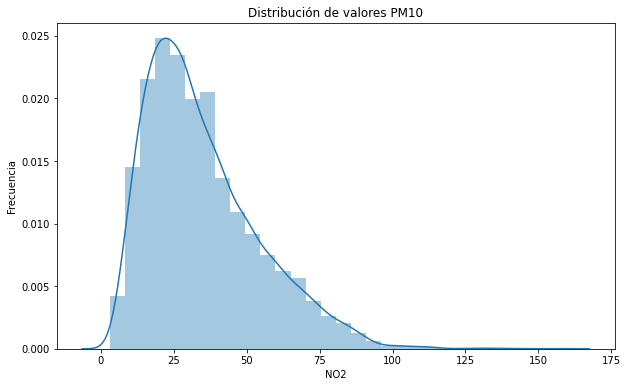

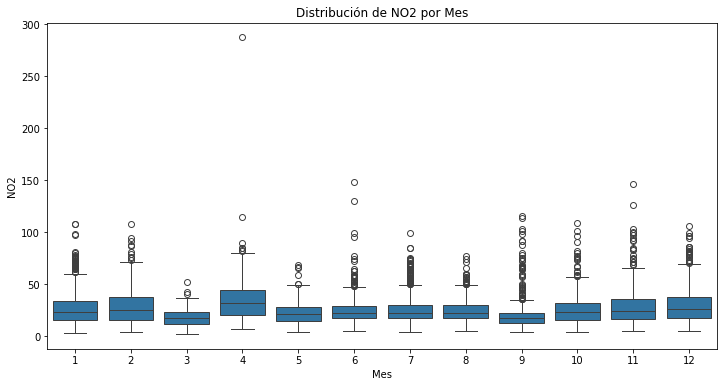

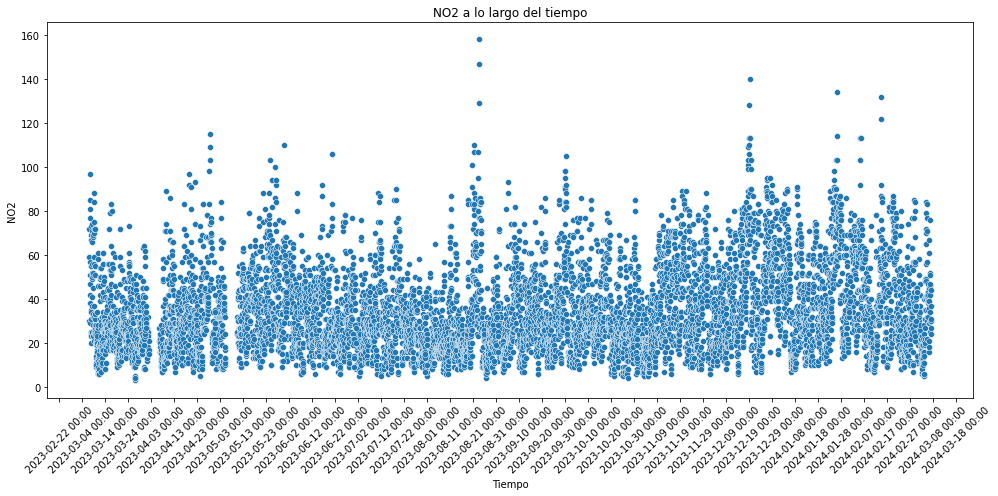

In [12]:
parameter_plots(eixample_2023,'NO2')

In [8]:
print(eixample_2023.head())

   CODI EOI           NOM ESTACIO       DATA            Hora TIPUS ESTACIO  \
0   8019043  Barcelona (Eixample) 2023-01-01 0 days 01:00:00       traffic   
1   8019043  Barcelona (Eixample) 2023-01-01 0 days 02:00:00       traffic   
2   8019043  Barcelona (Eixample) 2023-01-01 0 days 03:00:00       traffic   
3   8019043  Barcelona (Eixample) 2023-01-01 0 days 04:00:00       traffic   
4   8019043  Barcelona (Eixample) 2023-01-01 0 days 05:00:00       traffic   

  AREA URBANA  CODI INE   MUNICIPI  CODI COMARCA NOM COMARCA  ...  \
0       urban      8019  Barcelona            13  Barcelonès  ...   
1       urban      8019  Barcelona            13  Barcelonès  ...   
2       urban      8019  Barcelona            13  Barcelonès  ...   
3       urban      8019  Barcelona            13  Barcelonès  ...   
4       urban      8019  Barcelona            13  Barcelonès  ...   

                 Georeferència   CO  NO NO2  NOX   O3  PM10  SO2  \
0  POINT (2.1537998 41.385315)  0.9 NaN NaN  NaN

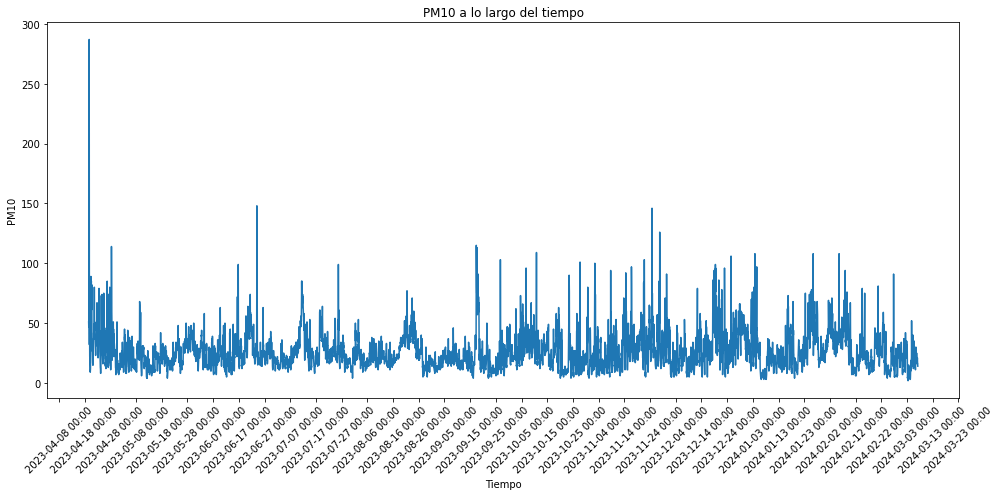

In [13]:

import matplotlib.dates as mdates


# Asumiendo que 'eixample_2023' es tu DataFrame y ya tiene una columna 'Timestamp'
# para las marcas de tiempo combinadas de fecha y hora

# Gráfico de serie temporal de PM10
plt.figure(figsize=(14, 7))
sns.lineplot(data=eixample_2023, x='Date_time', y='PM10')

# Formateador para el eje x
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))  # Ajusta el intervalo según necesites

plt.title('PM10 a lo largo del tiempo')
plt.xlabel('Tiempo')
plt.ylabel('PM10')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-16-19e7ed8f94a7>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(eixample_2023[parameter], bins=30, kde=True)
<ipython-input-16-19e7ed8f94a7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eixample_2023['Mes'] = eixample_2023['Timestamp'].dt.month  # Agrega una columna de mes si quieres agrupar por mes


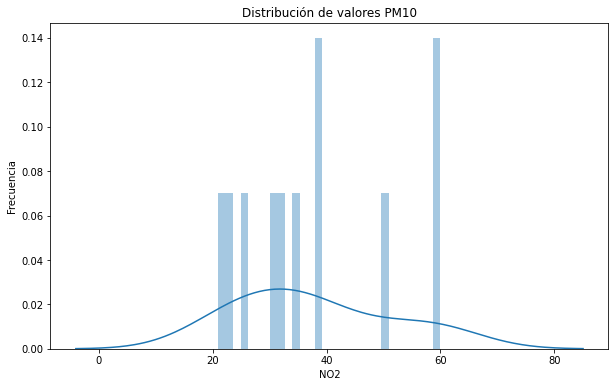

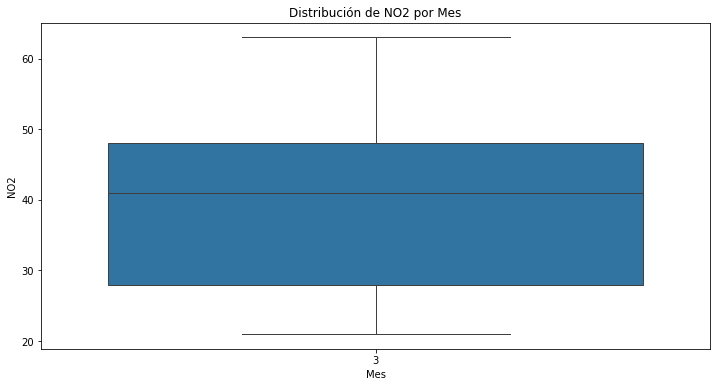

OverflowError: int too big to convert

Error in callback <function _draw_all_if_interactive at 0x000001961BFC8F70> (for post_execute):


OverflowError: int too big to convert

OverflowError: int too big to convert

In [17]:


eixample_1day = eixample_2023[eixample_2023['DATA']=='2023-03-01'] 
parameter_plots(eixample_1day,'NO2')

In [21]:
print('CO level in Barcelona(eixample) 2023')
eixample_2023['CO'].describe()


CO level in Barcelona(eixample) 2023


count    1714.000000
mean        0.330280
std         0.223696
min         0.200000
25%         0.200000
50%         0.200000
75%         0.400000
max         2.200000
Name: CO, dtype: float64